Linear Regression on Boston dataset

In [137]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [101]:
from sklearn.datasets import load_boston
boston = load_boston()


In [102]:
print(boston.data.shape)

(506, 13)


In [103]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [22]:
print(boston.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
#Loading the Boston data and splitting into test and train.
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [110]:
# standardizing data
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [111]:
train_data=pd.DataFrame(x_train)
train_data['PRICE']=y_train
train_data.head(3)

x_test=np.array(x_test)
y_test=np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


Linear Regression using inbuilt function

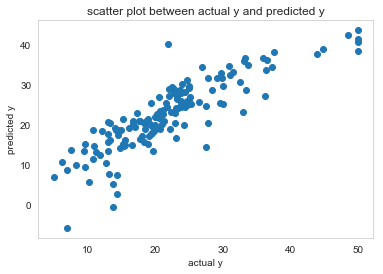

Mean Squared Error between Actual and Predicted values:  22.615007025836285


22.615007025836285

In [141]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

Y_pred = lm.predict(x_test)

plot_(y_test,Y_pred)

#plt.scatter(test_data, y_pred)
#plt.xlabel("Prices: $Y_i$")
#plt.ylabel("Predicted prices: $\hat{Y}_i$")
#plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#plt.show()

Using SGD Regressor

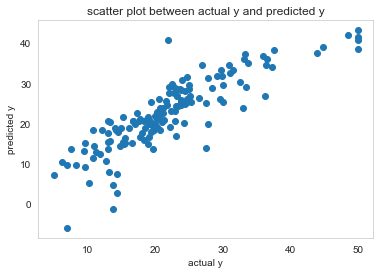

Mean Squared Error between Actual and Predicted values:  22.88629594848648


22.88629594848648

In [165]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor()
lm.fit(x_train, y_train)

Y_pred = lm.predict(x_test)

plot_(y_test,Y_pred)

In [177]:
X_train.shape[0]
X_train.shape[1]

13

#Computing SDG

In [206]:
def Compute_SGD(X_train, y_train, lr_rate, n_epochs):
    w_coeff=np.random.randn(13,1) #Randomly initalizing weights
    b_coeff=np.random.randn(1,1)  #Randomly picking up intercept value.
    
    for epoch in range(1,n_epochs+1):
        sum_errors = 0 #Sum of squared loss.
        N = X_train.shape[0] #The variable N in the SGD equation.(339 in this case)

        for i in range(N):
            batch_size = np.random.randint(0,N)  # randomly picks one value from 0 to 339
            X_i = X_train[batch_size,:].reshape(1,X_train.shape[1])# Reshaping to size(1,13)
            y_i = y_train[batch_size].reshape(1,1)

            y_pred = np.dot(X_i,w_coeff) + b_coeff                  #y_true = WT.X + B(not taking transpose because we initialised w as (13,1))
            loss = y_pred - y_i                                     #w_grad = df/dw = (-2/N)*(X)*(y-(WT.X+B)) = (-2/N)*(X) * loss 
            sum_errors += loss**2                                   #b_grad = df/db = (-2/N)*(y-(WT.X+B)) = (-2/N) * loss

            w_grad = X_i.T.dot((y_pred - y_i))
            b_grad = (y_pred - y_i)

            w_coeff = w_coeff -(2/N)*lr_rate*(w_grad)               #wold = wnew - learning rate * df/dw
            b_coeff = b_coeff - (2/N)*lr_rate*(b_grad)              #bold = bnew - learning rate * df/db

        #print("Epoch: %d, Loss: %.3f" %(epoch, sum_errors/N))

       

    return w_coeff, b_coeff


def predict(X_test, w_coeff, b_coeff):
    X_test=np.array(X_test)
    y_pred =[]
    for i in range(0,len(X_test)):
        y=np.asscalar(np.dot(w_coeff,X_test[i]) + b_coeff) #Convert an array of size 1 to its scalar equivalent.
        y_pred.append(y)
    return np.array(y_pred)

    
def plot_scatter(y_test,y_pred):
    plt.scatter(y_test,y_pred)
    plt.title('Scatter plot between Actual and Predicted Y.')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()

    #Get the mean squared error between the predicted and the actual values.   
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error between Actual and Predicted values: ',mse)
    return mse


In [207]:
#Get the optimal value of the w coefficients and b coefficients.
w_coeff_optimal, b_coeff_optimal = Compute_SGD(x_train, y_train, lr_rate=0.01,n_epochs=1000)

In [169]:
#Get the optimal value of the w coefficients and b coefficients.
w_coeff_optimal, b_coeff_optimal = Compute_SGD(x_train, y_train, lr_rate=0.01,n_epochs=500)

Epoch: 1, Loss: 580.250
Epoch: 2, Loss: 582.005
Epoch: 3, Loss: 513.077
Epoch: 4, Loss: 516.218
Epoch: 5, Loss: 517.459
Epoch: 6, Loss: 447.389
Epoch: 7, Loss: 491.677
Epoch: 8, Loss: 460.197
Epoch: 9, Loss: 402.876
Epoch: 10, Loss: 406.495
Epoch: 11, Loss: 388.413
Epoch: 12, Loss: 388.862
Epoch: 13, Loss: 355.457
Epoch: 14, Loss: 345.264
Epoch: 15, Loss: 312.179
Epoch: 16, Loss: 321.965
Epoch: 17, Loss: 301.958
Epoch: 18, Loss: 289.002
Epoch: 19, Loss: 278.762
Epoch: 20, Loss: 259.681
Epoch: 21, Loss: 248.049
Epoch: 22, Loss: 232.697
Epoch: 23, Loss: 260.703
Epoch: 24, Loss: 227.762
Epoch: 25, Loss: 190.353
Epoch: 26, Loss: 214.358
Epoch: 27, Loss: 244.215
Epoch: 28, Loss: 195.348
Epoch: 29, Loss: 208.377
Epoch: 30, Loss: 175.595
Epoch: 31, Loss: 191.412
Epoch: 32, Loss: 172.517
Epoch: 33, Loss: 151.837
Epoch: 34, Loss: 175.240
Epoch: 35, Loss: 196.071
Epoch: 36, Loss: 169.896
Epoch: 37, Loss: 145.891
Epoch: 38, Loss: 144.091
Epoch: 39, Loss: 129.340
Epoch: 40, Loss: 122.267
Epoch: 41

Epoch: 333, Loss: 33.088
Epoch: 334, Loss: 28.549
Epoch: 335, Loss: 26.586
Epoch: 336, Loss: 19.876
Epoch: 337, Loss: 25.399
Epoch: 338, Loss: 20.654
Epoch: 339, Loss: 24.675
Epoch: 340, Loss: 13.317
Epoch: 341, Loss: 19.158
Epoch: 342, Loss: 27.887
Epoch: 343, Loss: 23.729
Epoch: 344, Loss: 25.471
Epoch: 345, Loss: 33.896
Epoch: 346, Loss: 21.267
Epoch: 347, Loss: 19.149
Epoch: 348, Loss: 20.797
Epoch: 349, Loss: 25.687
Epoch: 350, Loss: 19.729
Epoch: 351, Loss: 25.638
Epoch: 352, Loss: 23.308
Epoch: 353, Loss: 25.700
Epoch: 354, Loss: 25.330
Epoch: 355, Loss: 20.121
Epoch: 356, Loss: 22.873
Epoch: 357, Loss: 23.574
Epoch: 358, Loss: 26.577
Epoch: 359, Loss: 22.688
Epoch: 360, Loss: 19.042
Epoch: 361, Loss: 24.041
Epoch: 362, Loss: 26.685
Epoch: 363, Loss: 19.412
Epoch: 364, Loss: 16.842
Epoch: 365, Loss: 33.811
Epoch: 366, Loss: 25.613
Epoch: 367, Loss: 24.152
Epoch: 368, Loss: 22.041
Epoch: 369, Loss: 27.458
Epoch: 370, Loss: 12.664
Epoch: 371, Loss: 22.397
Epoch: 372, Loss: 22.996


D:\AAnaconda\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


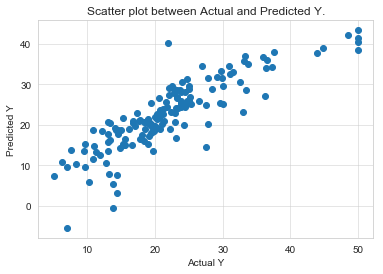

Mean Squared Error between Actual and Predicted values:  22.67705485681849


In [208]:
y_pred = predict(x_test, w_coeff_optimal.T, b_coeff_optimal)

#Draw the scatter plot
mse1=plot_scatter(y_test,y_pred)


Observation:

In [210]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "MSE"]

x.add_row(["Custom SGD Regression", 22.67])
x.add_row(["Linear Regression", 22.61])
x.add_row(["SGD Regression",22.88])


print(x)

+-----------------------+-------+
|         Model         |  MSE  |
+-----------------------+-------+
| Custom SGD Regression | 22.67 |
|   Linear Regression   | 22.61 |
|     SGD Regression    | 22.88 |
+-----------------------+-------+


Observation:
Custom SGD regressor is applied on Boston dataset with learning rate of 0.01 and 1000 epochs. The obtained Mean squared error value 22.67 is almost same as Linear Regression.